In [1]:
import pandas as pd
import datetime as dt

In [2]:
data = pd.read_csv('../data/train_data.csv')
data.iloc[-1,0] = '2019/11/24'
data = data.dropna(how='any')

In [3]:
data.tail()

,Date,VGSH,JEF,IVZ,KTCC,FBZ,PLOW,JBK,IAC,IVR,...,ASFI,JTA,MNR,TFSL,GTN,TYG,VIRC,BIS,WOOD,MASI
414,2019/10/20,60.317860,18.666267,16.484234,6.10,14.971986,44.943859,28.51,226.830002,13.591201,...,6.68,10.895230,14.336699,18.526958,16.570000,17.703754,3.96,17.644960,63.487255,143.740005
415,2019/10/27,60.417824,18.853819,16.638926,5.97,15.280874,48.024773,29.00,229.559998,13.800565,...,6.95,11.057277,14.815565,19.043219,16.830000,17.788372,4.01,16.251677,64.136101,147.509995
416,2019/11/3,60.288853,19.238792,17.527559,6.23,14.581332,51.991562,30.00,219.949997,14.149504,...,10.10,11.200258,14.385562,19.189333,19.980000,17.243061,4.09,16.082491,65.034508,142.949997
417,2019/11/10,60.397987,18.967628,17.163631,5.96,14.726692,52.336071,28.50,221.820007,13.913970,...,10.25,11.209790,14.543064,19.189333,19.049999,17.111437,3.93,15.754073,65.343956,149.770004
418,2019/11/17,60.388062,20.636860,17.045601,5.52,14.763033,52.089993,28.74,221.639999,14.044824,...,10.43,11.114470,14.463972,19.267258,19.850000,16.888838,3.68,14.709110,64.635216,153.350006


In [4]:
data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0])

In [5]:
data_wide = data.copy()
data_wide.index = data_wide.iloc[:,0]
data_wide = data_wide.drop('Date', axis=1)

In [6]:
from sklearn.preprocessing import minmax_scale
data_wide_norm = pd.DataFrame(minmax_scale(data_wide))
data_wide_norm = pd.concat([pd.DataFrame(data_wide.index), data_wide_norm], axis=1)
data_wide_norm = data_wide_norm.set_index('Date')
data_wide_norm.columns = data_wide.columns

In [7]:
data_wide_norm_ave14 = data_wide_norm.rolling(window=14).mean()

In [8]:
data_long_norm_ave14 = data_wide_norm_ave14.stack().reset_index()
data_long_norm_ave14.columns = ['date', 'symbol', 'stockPrice']
data_long_norm_ave14.head()

,date,symbol,stockPrice
0,2012-02-12,VGSH,0.015901
1,2012-02-12,JEF,0.523704
2,2012-02-12,IVZ,0.117704
3,2012-02-12,KTCC,0.196405
4,2012-02-12,FBZ,0.787721


In [9]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
# from sklearn.preprocessing import minmax_scale

In [10]:
stockPriceList = []
symbolList = []
for name, group in data_long_norm_ave14.groupby('symbol'):
    sotckPrice = minmax_scale(group['stockPrice'])
    stockPriceList.append([sotckPrice])
    symbolList.append(name)
ts = to_time_series_dataset(stockPriceList)
km = TimeSeriesKMeans(n_clusters=4, metric="dtw")
labels = km.fit_predict(ts)
labels = pd.DataFrame(labels)
labels.columns = ['cluster']
labels = labels.reset_index(drop=True)
symbols = pd.DataFrame(symbolList)
cluster = pd.concat([symbols, labels], axis=1)
cluster.columns = ['symbol', 'label']

In [15]:
data_cluster = pd.merge(data_long_norm_ave14, cluster, on='symbol')
data_cluster['label'].value_counts()

1    462434
3    456750
2    214774
0    196910
Name: label, dtype: int64

In [16]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

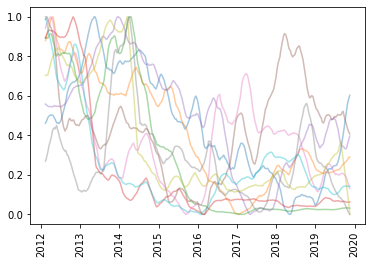

In [17]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

cluster_samples = cluster[cluster['label'] == 0].sample(10)

for sym in cluster_samples['symbol']:
    data_plot = data_cluster[data_cluster['symbol']==sym]
    x = data_plot.loc[:,'date']
    y = data_plot.loc[:,'stockPrice']
    ax.plot(x, minmax_scale(y), alpha=0.4)

plt.show()

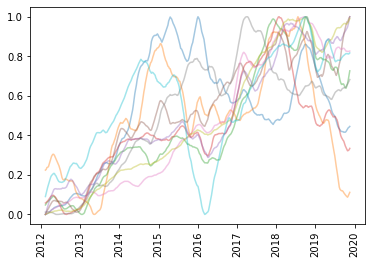

In [18]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

cluster_samples = cluster[cluster['label'] == 1].sample(10)

for sym in cluster_samples['symbol']:
    data_plot = data_cluster[data_cluster['symbol']==sym]
    x = data_plot.loc[:,'date']
    y = data_plot.loc[:,'stockPrice']
    ax.plot(x, minmax_scale(y), alpha=0.4)

plt.show()

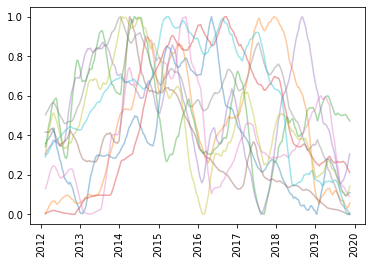

In [19]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

cluster_samples = cluster[cluster['label'] == 2].sample(10)

for sym in cluster_samples['symbol']:
    data_plot = data_cluster[data_cluster['symbol']==sym]
    x = data_plot.loc[:,'date']
    y = data_plot.loc[:,'stockPrice']
    ax.plot(x, minmax_scale(y), alpha=0.4)

plt.show()

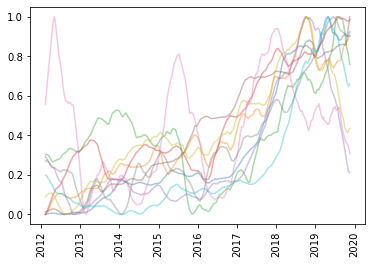

In [20]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)

cluster_samples = cluster[cluster['label'] == 3].sample(10)

for sym in cluster_samples['symbol']:
    data_plot = data_cluster[data_cluster['symbol']==sym]
    x = data_plot.loc[:,'date']
    y = data_plot.loc[:,'stockPrice']
    ax.plot(x, minmax_scale(y), alpha=0.4)

plt.show()